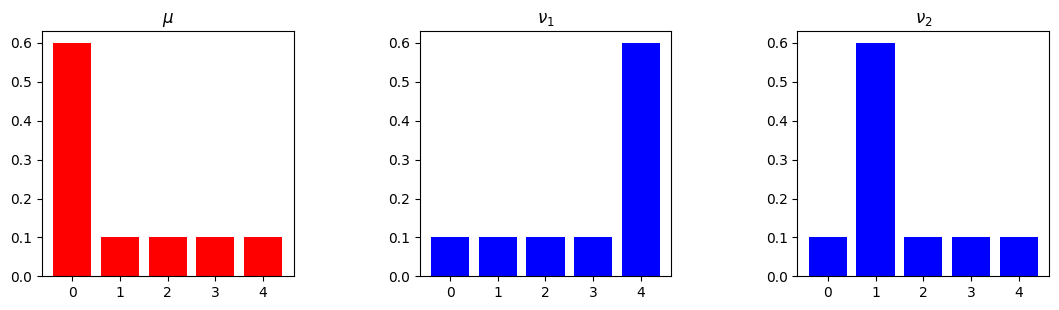

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt


sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]


P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)


sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

fig = plt.figure(figsize=(13,7))
fig.subplots_adjust(wspace=0.5)
plt.subplot(2,3,1)
plt.bar(np.arange(len(P)), P, color='r')
plt.title(r"$\mu$")

plt.subplot(2,3,2)
plt.bar(np.arange(len(Q)), Q, color='b')
plt.title(r"$\nu_1$")

plt.subplot(2,3,3)
plt.bar(np.arange(len(Q2)), Q2, color='b')
plt.title(r"$\nu_2$")
plt.show()

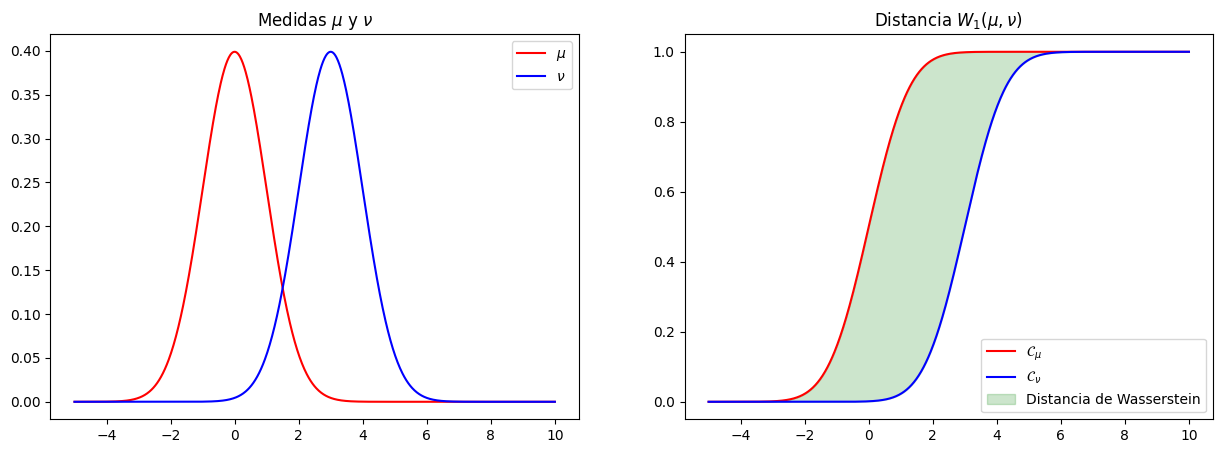

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import wasserstein_distance


mean1, std1 = 0, 1  
mean2, std2 = 3, 1  


x = np.linspace(-5, 10, 1000)

# Cálculo de las PDFs
mu = norm.pdf(x, mean1, std1)
nu = norm.pdf(x, mean2, std2)

# Cálculo de las CDFs
cdf1 = norm.cdf(x, mean1, std1)
cdf2 = norm.cdf(x, mean2, std2)

# Cálculo de la distancia de Wasserstein
wasserstein_dist = wasserstein_distance(norm.rvs(loc=mean1, scale=std1, size=10000),
                                        norm.rvs(loc=mean2, scale=std2, size=10000))


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica de las PDFs
axes[0].plot(x, mu, label=r'$\mu$', color='red')
axes[0].plot(x, nu, label=r'$\nu$', color='blue')
axes[0].legend()
axes[0].set_title(r'Medidas $\mu$ y $\nu$')

# Gráfica de las CDFs
axes[1].plot(x, cdf1, label=r'$\mathcal{C}_{\mu}$', color='red')
axes[1].plot(x, cdf2, label=r'$\mathcal{C}_{\nu}$', color='blue')
axes[1].fill_between(x, cdf1, cdf2, color='green', alpha=0.2, label="Distancia de Wasserstein")
axes[1].legend()
axes[1].set_title(r'Distancia $W_1(\mu, \nu)$')

plt.show()

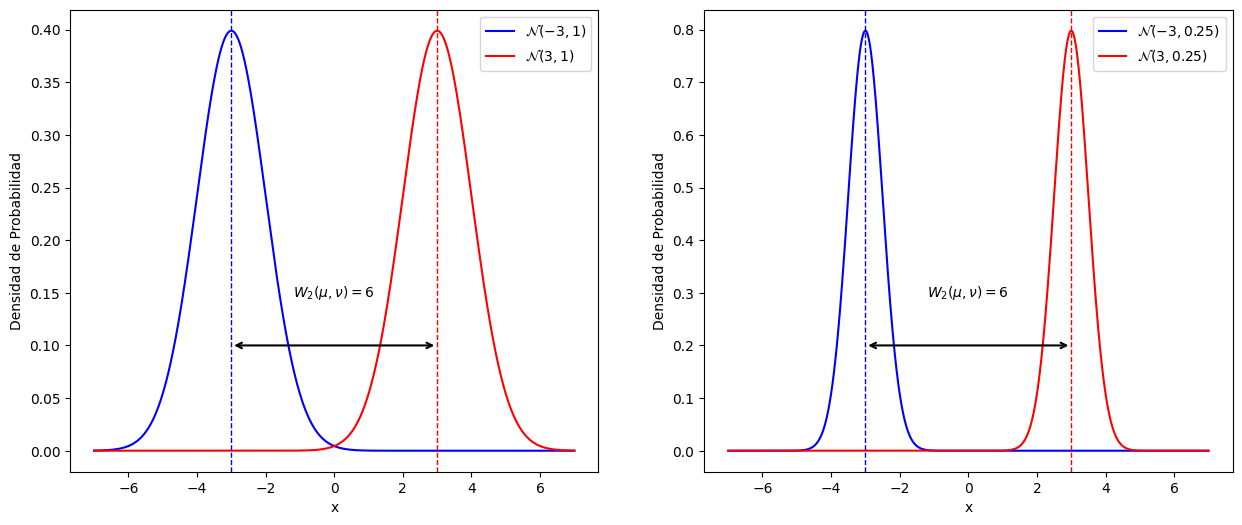

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros para las distribuciones normales
mean1, std1 = -3, 1  
mean2, std2 = 3, 1  
mean3, std3 = -3, 0.5  
mean4, std4 = 3, 0.5  

x = np.linspace(-7, 7, 1000)

# (PDF)
pdf1 = norm.pdf(x, mean1, std1)
pdf2 = norm.pdf(x, mean2, std2)
pdf3 = norm.pdf(x, mean3, std3)
pdf4 = norm.pdf(x, mean4, std4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico
ax1.plot(x, pdf1, label=r'$\mathcal{N}(-3,1)$', color='blue')
ax1.plot(x, pdf2, label=r'$\mathcal{N}(3,1)$', color='red')
ax1.axvline(mean1, color='blue', linestyle='--', linewidth=1)
ax1.axvline(mean2, color='red', linestyle='--', linewidth=1)
ax1.annotate(
    '',
    xy=(mean1, 0.1), xycoords='data',
    xytext=(mean2, 0.1), textcoords='data',
    arrowprops={'arrowstyle': '<->', 'color': 'black', 'lw': 1.5}
)
ax1.text(
    (mean1 + mean2) / 2, 0.15, 
    r'$W_2(\mu, \nu) = 6$',
    horizontalalignment='center',
    verticalalignment='center'
)
ax1.set_xlabel('x')
ax1.set_ylabel('Densidad de Probabilidad')
ax1.legend()

# Segundo gráfico
ax2.plot(x, pdf3, label=r'$\mathcal{N}(-3,0.25)$', color='blue')
ax2.plot(x, pdf4, label=r'$\mathcal{N}(3,0.25)$', color='red')
ax2.axvline(mean3, color='blue', linestyle='--', linewidth=1)
ax2.axvline(mean4, color='red', linestyle='--', linewidth=1)
ax2.annotate(
    '',
    xy=(mean3, 0.2), xycoords='data',
    xytext=(mean4, 0.2), textcoords='data',
    arrowprops={'arrowstyle': '<->', 'color': 'black', 'lw': 1.5}
)
ax2.text(
    (mean3 + mean4) / 2, 0.3, 
    r'$W_2(\mu, \nu) = 6$',
    horizontalalignment='center',
    verticalalignment='center'
)
ax2.set_xlabel('x')
ax2.set_ylabel('Densidad de Probabilidad')
ax2.legend()

plt.show()


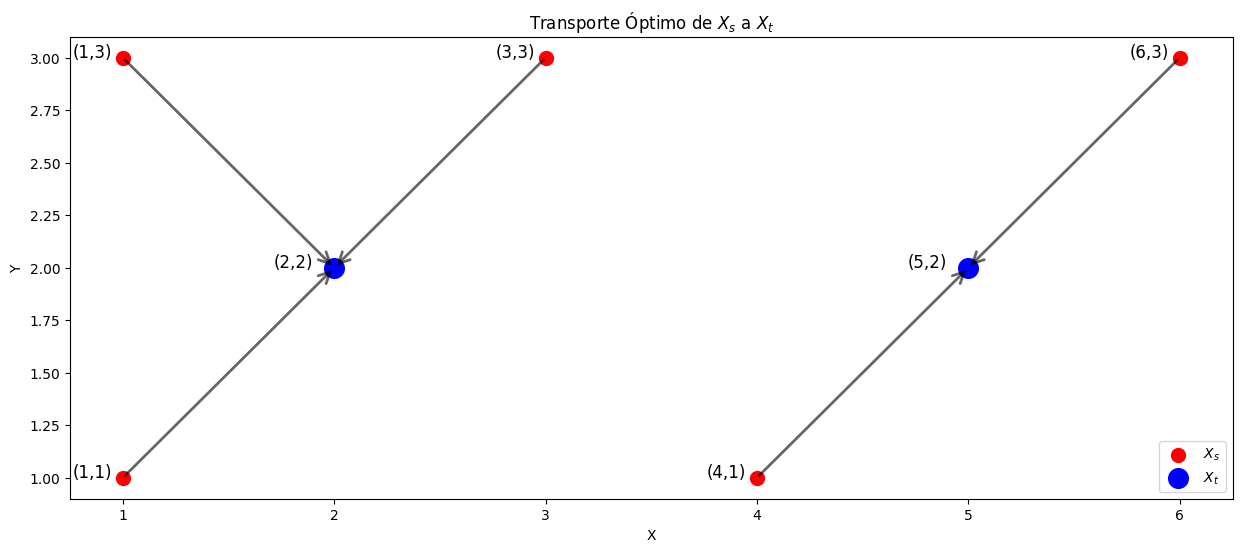

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Puntos fuente y destino
X_s = np.array([[1, 1], [1,3], [3, 3], [4, 1], [6, 3]])
X_t = np.array([[2, 2], [5, 2]])

# Plan de transporte óptimo
gamma_0 = np.array([[1/6, 0],
                    [1/6, 0],
                    [1/6, 0],
                    [0, 0.25],
                    [0, 0.25]])

fig, ax = plt.subplots(figsize=(15, 6))

# Xs
ax.scatter(X_s[:, 0], X_s[:, 1], color='red', label=r'$X_s$', s=100)
for i, txt in enumerate(['(1,1)', '(1,3)' , '(3,3)', '(4,1)', '(6,3)']):
    ax.annotate(txt, (X_s[i, 0] - 0.05, X_s[i, 1]), fontsize=12, ha='right')

# Xt
ax.scatter(X_t[:, 0], X_t[:, 1], color='blue', label=r'$X_t$', s=200)
for i, txt in enumerate(['(2,2)', '(5,2)']):
    ax.annotate(txt, (X_t[i, 0]- 0.1, X_t[i, 1]), fontsize=12, ha='right')

# Flechas
for i in range(X_s.shape[0]):
    for j in range(X_t.shape[0]):
        if gamma_0[i, j] > 0:  # Solo dibujar flechas para probabilidades > 0
            ax.annotate("",
                        xy=(X_t[j, 0], X_t[j, 1]), xycoords='data',
                        xytext=(X_s[i, 0], X_s[i, 1]), textcoords='data',
                        arrowprops=dict(arrowstyle="->", lw=2, alpha=0.6, mutation_scale=20))

# Configurar el gráfico
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Transporte Óptimo de $X_s$ a $X_t$')
plt.show()


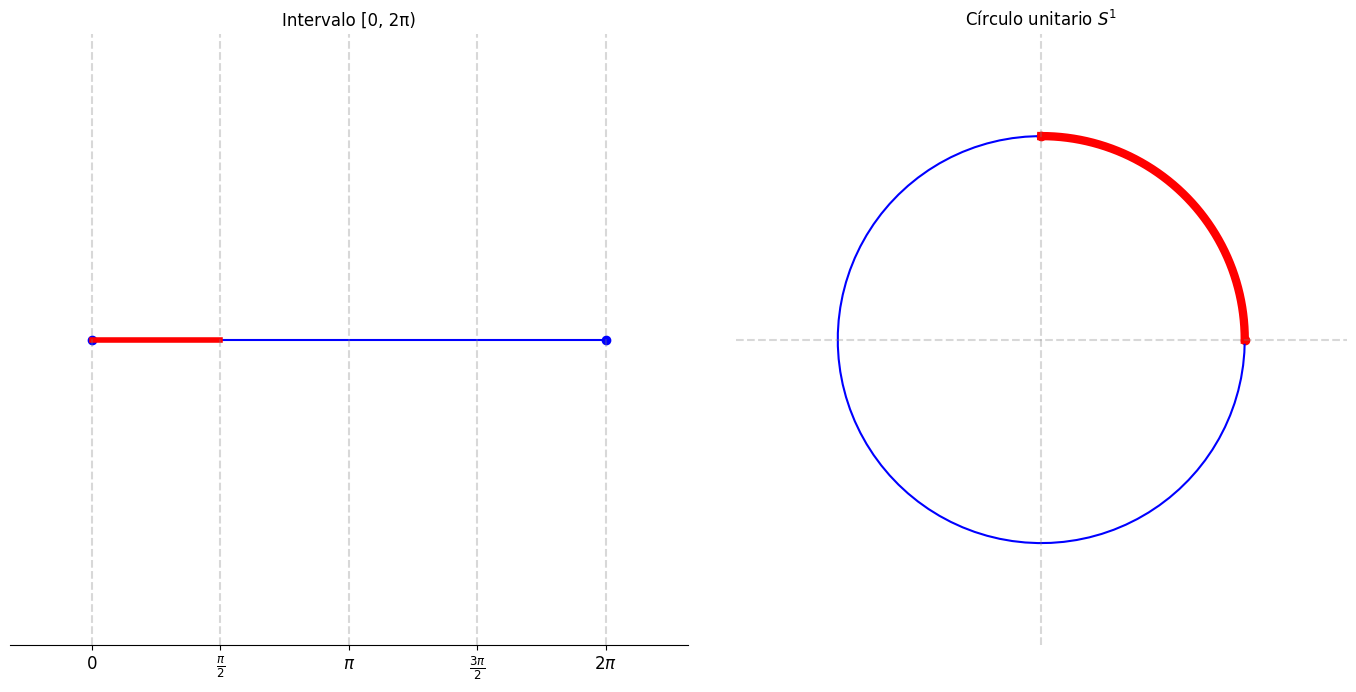

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico del intervalo [0, 2pi)
ax[0].plot([0, 2 * np.pi], [0, 0], color='blue', marker='o')
ax[0].plot([0, np.pi/2], [0, 0], color='red', linewidth=4)
ax[0].set_xlim(-1, 2 * np.pi + 1)
ax[0].set_ylim(-1, 1)
ax[0].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax[0].set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=12)
ax[0].set_yticks([])
ax[0].spines['left'].set_color('none')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[0].axvline(x=0, color='gray', linestyle='--', alpha=.3)
ax[0].axvline(x=np.pi/2, color='gray', linestyle='--', alpha=.3)
ax[0].axvline(x=np.pi, color='gray', linestyle='--', alpha=.3)
ax[0].axvline(x=(3/2)*np.pi, color='gray', linestyle='--', alpha=.3)
ax[0].axvline(x=2*np.pi, color='gray', linestyle='--', alpha=.3)

ax[0].set_title("Intervalo [0, 2π)")

# Dibujar líneas de puntos a círculo
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Gráfico del círculo unitario
ax[1].plot(x, y, color='blue')
ax[1].plot(np.cos(np.linspace(0, np.pi/2, 50)), np.sin(np.linspace(0, np.pi/2, 50)), color='red', linewidth=6)
ax[1].scatter(np.cos([0, np.pi/2]), np.sin([0, np.pi/2]), color='red')
ax[1].set_xlim(-1.5, 1.5)
ax[1].set_ylim(-1.5, 1.5)
ax[1].set_aspect('equal')
ax[1].axis('off')  # Eliminar los ejes del círculo

# Agregar los ejes cartesianos
ax[1].axhline(y=0, color='gray', linestyle='--', alpha=.3)
ax[1].axvline(x=0, color='gray', linestyle='--', alpha=.3)

ax[1].set_title("Círculo unitario $S^1$")


# Mostrar el gráfico
plt.tight_layout()
plt.show()


---
Ejemplo para algoritmo Húngaro
---
---

In [17]:
X[:, 1]

array([0, 0])

---
Sensibilidad a los datos de entrada
---
---

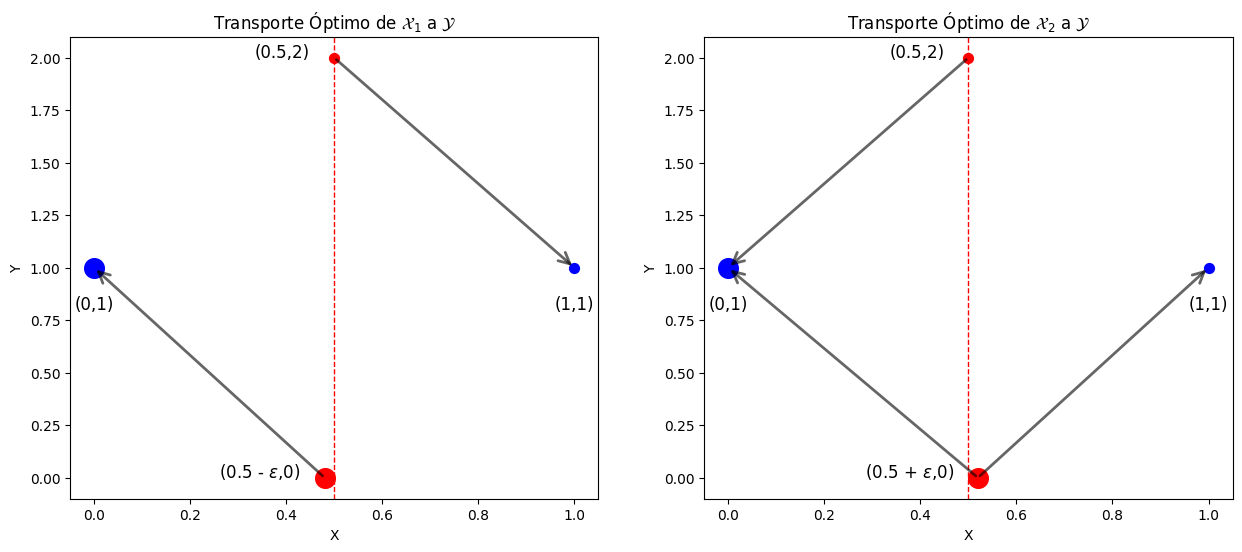

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Puntos fuente y destino
X1 = np.array([[1/2 - 0.02, 0], [1/2, 2]])
X2 = np.array([[1/2 + 0.02, 0], [1/2, 2]])
Y = np.array([[0, 1], [1, 1]])

# Planes de transporte óptimo
gamma_1 = np.array([[2/3, 0],
                    [0, 1/3]])

gamma_2 = np.array([[1/3, 1/3],
                    [1/3, 0]])

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico izquierda: X_s1
axs[0].scatter(X1[0, 0], X1[0, 1], color='red', label=r'$X_s$', s=200)
axs[0].scatter(X1[1, 0], X1[1, 1], color='red', s=50)
for i, txt in enumerate(['(0.5 - $\epsilon$,0)', '(0.5,2)']):
    axs[0].annotate(txt, (X1[i, 0] - 0.05, X1[i, 1]), fontsize=12, ha='right')

# Xt
axs[0].scatter(Y[0, 0], Y[0, 1], color='blue', label=r'$X_t$', s=200)
axs[0].scatter(Y[1, 0], Y[1, 1], color='blue', s=50)
for i, txt in enumerate(['(0,1)', '(1,1)']):
    axs[0].annotate(txt, (Y[i, 0], Y[i, 1] - 0.2), fontsize=12, ha='center')


axs[0].axvline(1/2, color='red', linestyle='--', linewidth=1)


# Flechas
for i in range(X1.shape[0]):
    for j in range(Y.shape[0]):
        if gamma_1[i, j] > 0:  # Solo dibujar flechas para probabilidades > 0
            axs[0].annotate("",
                            xy=(Y[j, 0], Y[j, 1]), xycoords='data',
                            xytext=(X1[i, 0], X1[i, 1]), textcoords='data',
                            arrowprops=dict(arrowstyle="->", lw=2, alpha=0.6, mutation_scale=20))

# Configurar el gráfico
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title('Transporte Óptimo de $\mathcal{X}_1$ a $\mathcal{Y}$')

# Gráfico derecha: X_s2
axs[1].scatter(X2[0, 0], X2[0, 1], color='red', label=r'$X_s$', s=200)
axs[1].scatter(X2[1, 0], X2[1, 1], color='red', s=50)
for i, txt in enumerate(['(0.5 + $\epsilon$,0)', '(0.5,2)']):
    axs[1].annotate(txt, (X2[i, 0] - 0.05, X2[i, 1]), fontsize=12, ha='right')

axs[1].axvline(1/2, color='red', linestyle='--', linewidth=1)

# Xt
axs[1].scatter(Y[0, 0], Y[0, 1], color='blue', label=r'$X_t$', s=200)
axs[1].scatter(Y[1, 0], Y[1, 1], color='blue', s=50)
for i, txt in enumerate(['(0,1)', '(1,1)']):
    axs[1].annotate(txt, (Y[i, 0], Y[i, 1] - 0.2), fontsize=12, ha='center')

# Flechas
for i in range(X2.shape[0]):
    for j in range(Y.shape[0]):
        if gamma_2[i, j] > 0:  # Solo dibujar flechas para probabilidades > 0
            axs[1].annotate("",
                            xy=(Y[j, 0], Y[j, 1]), xycoords='data',
                            xytext=(X2[i, 0], X2[i, 1]), textcoords='data',
                            arrowprops=dict(arrowstyle="->", lw=2, alpha=0.6, mutation_scale=20))

# Configurar el gráfico
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title('Transporte Óptimo de $\mathcal{X}_2$ a $\mathcal{Y}$')

plt.show()
